***Netflix Movies and TV shows data analysis***

There are total 5 Sections which individually solve 5 different problem statements.
- Section 1 : Content Overview
- Section 2 : Genre and Rating analysis
- Section 3 : People and Creators
- Section 4 : Temporal patterns
- Section 5 : Correlation and insightful views

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.columns #list out all the columns present in our dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Data cleaning**
We'll clean the Netflix dataset by:
- Checking for duplicates
- Handling missing values (`director`, `cast`, `country`, `date_added`, `rating`)
- Converting `date_added` to datetime
- Standardizing string columns (like lowercasing or stripping extra spaces if needed)

In [4]:
#checking for duplicates
df.duplicated().sum()
#there are no duplicates present 

np.int64(0)

In [5]:
#convert date columns to actual date because in raw data the format of date or time mentioned is mixed
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [6]:
df.isnull().sum() #checking for null values that means missing data

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#handling missing values
#we have missing values in columns : Director, Cast, Country. 
#so we will fill the missing values with unknown for the above columns and with some calculated value for the columns that follows: 
#rating, Date added, duration
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)
df.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\1615881626.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('unknown',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\1615881626.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [8]:
df['rating'].fillna(df['rating'].mode()[0],inplace=True)#we will fill the missing values with most frequently rated value.
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\3141775585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0],inplace=True)#we will fill the missing values with most frequently rated value.


In [15]:
df.isnull().sum()
#only 3 missing values left in duration column.
#since the mentioned type has categorical data that is the show is either a movie or tv show it is hard to define the duration just by mean or mode
#so first we will identify the type whether it is movie or tv show and based on that we will fill the null values further.
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [21]:
# Remove non-digit characters and convert to numeric
df['duration_minutes'] = df['duration'].str.extract(r'(\d+)')  # extract numbers
df['duration_minutes'] = pd.to_numeric(df['duration_minutes'], errors='coerce')  # convert to int

# Step 3: Calculate mean duration only for Movies (ignoring NaNs)
mean_movie_duration = df[df['type'] == 'Movie']['duration_minutes'].mean()

# Step 4: Fill NaN duration values for Movies with the mean value
df.loc[(df['type'] == 'Movie') & (df['duration_minutes'].isna()), 'duration_minutes'] = mean_movie_duration

# Fill NaNs for ALL rows with mean movie duration
df['duration'].fillna(mean_movie_duration, inplace=True)

# Step 5: Save cleaned data so changes persist after kernel restart
df.to_csv("netflix_cleaned.csv", index=False)

print("✅ Duration column cleaned and saved permanently.")
print(f"Mean duration used for Movies: {mean_movie_duration:.2f} minutes")

✅ Duration column cleaned and saved permanently.
Mean duration used for Movies: 99.58 minutes


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\3919212330.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(mean_movie_duration, inplace=True)


In [22]:
df=pd.read_csv('netflix_cleaned.csv')
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
duration_minutes    0
dtype: int64

In [23]:
#now let us check for duplicates
df.duplicated().sum()

np.int64(0)

**Section 1 : Content Overview**
- What is the total number of Movies vs TV Shows on Netflix?

- How has Netflix content evolved over the years?

- Which months or years saw the highest content additions?

- Which countries have produced the most Netflix content?

C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\625495195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='pastel')


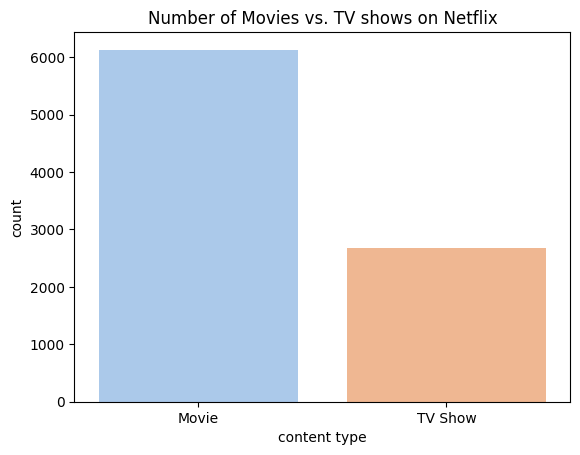

In [30]:
#total number of movies vs Tv shows on netflix
df['type'].value_counts()
plt.Figure(figsize=(6,4))
sns.countplot(data=df,x='type',palette='pastel')
plt.title("Number of Movies vs. TV shows on Netflix")
plt.xlabel('content type')
plt.ylabel("count")
plt.show()

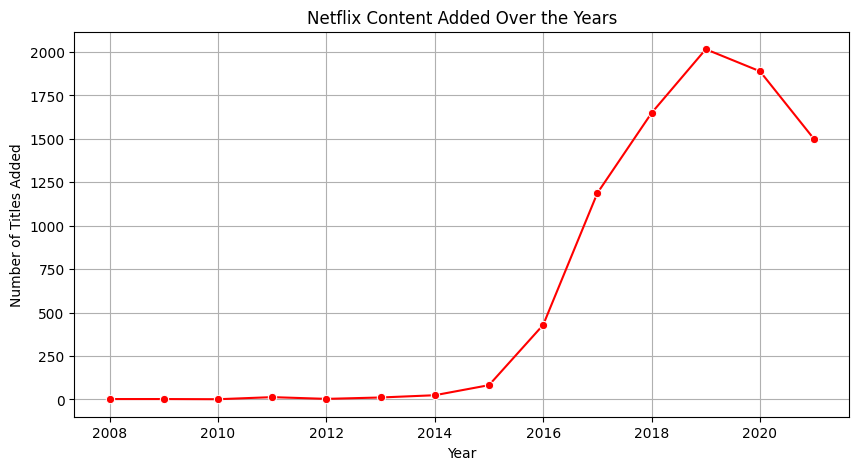

In [ ]:
#how has netflix content evolved over the years

# Ensure date_added is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Count titles by year
yearly_counts = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", color="red")
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\577866552.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')


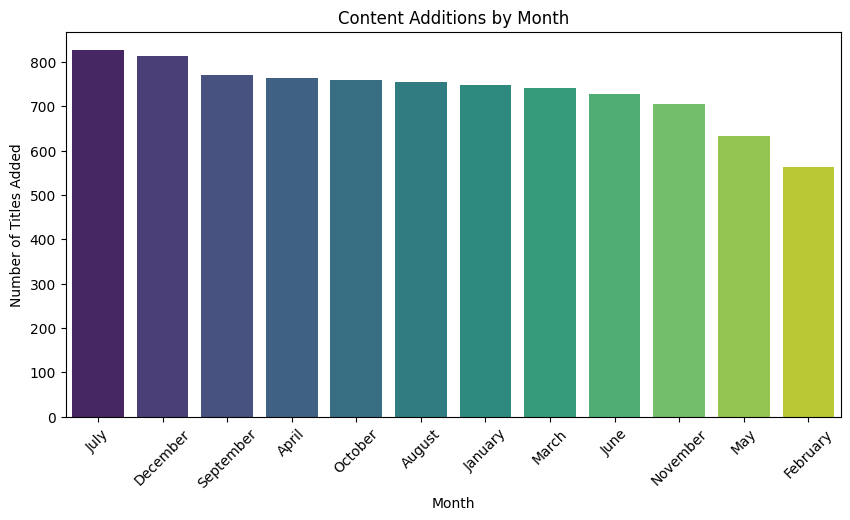

In [ ]:
#which month or year has the highest content additions?

# Extract month name
df['month_added'] = df['date_added'].dt.month_name()

# Count by month
month_counts = df['month_added'].value_counts()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title("Content Additions by Month")
plt.ylabel("Number of Titles Added")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\977121620.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')


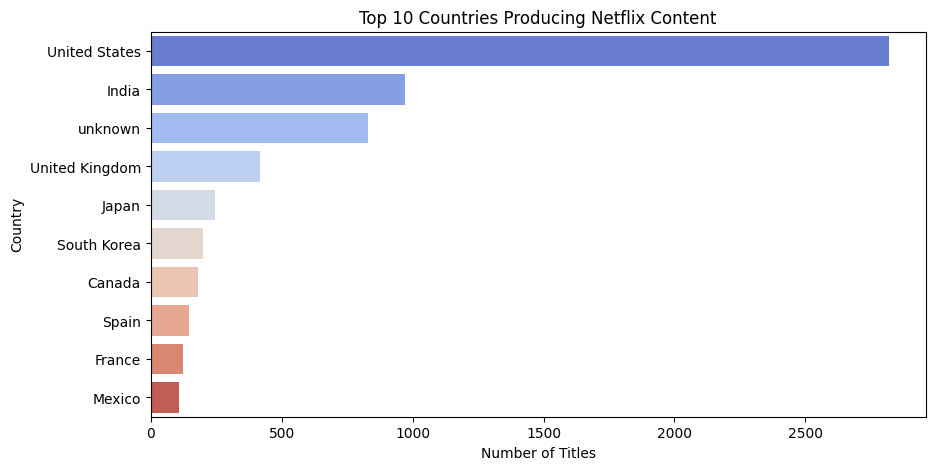

In [37]:
#which country has produced the most netflix content?

# Fill missing country with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Count by country
country_counts = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


**Section 2 : Genre and Rating analysis**
- What are the most common genres (listed in listed_in) on Netflix?

- Which are the top ratings (e.g. TV-MA, PG-13)?

- How do movie and TV show durations vary? (using duration)

- What kind of content dominates specific genres (e.g., is Drama more in Movies or Shows)?

C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\1075373762.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre',data=genre_df,palette='mako')


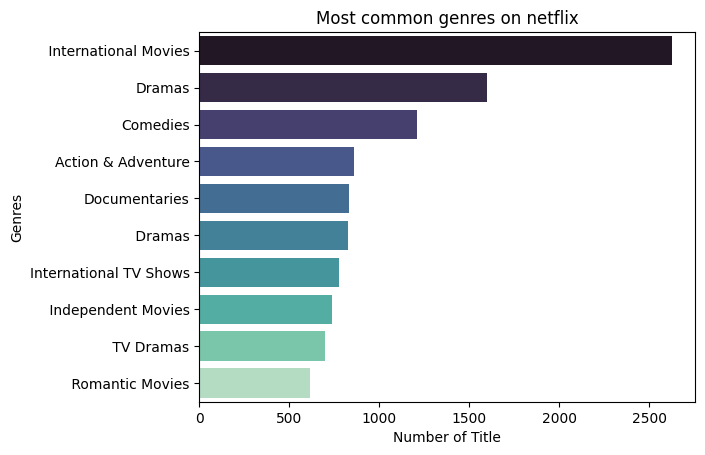

In [51]:
#What are the most common genres on Netflix?
from collections import Counter

df.columns.isnull().sum()#there are no null values

#split genres and counts
genre_counts=Counter()

for genres in df['listed_in']:
    for genre in genres.split(","):
        genre_counts[genre]+=1
        
#convert to dataframe
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False).head(10)
genre_df

#plotting the graph
plt.Figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre',data=genre_df,palette='mako')
plt.title('Most common genres on netflix')
plt.xlabel('Number of Title')
plt.ylabel('Genres')
plt.show()

Empty DataFrame
Columns: [title, rating, duration]
Index: []
rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Unknown        3
UR             3
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\2532144991.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_count.values, y=rating_count.index, palette='cubehelix')


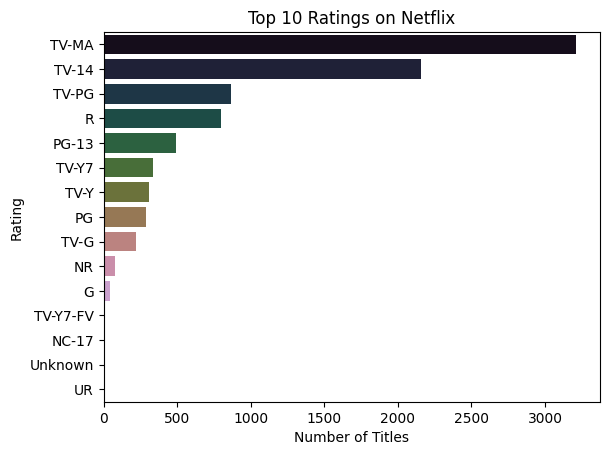

In [63]:
#which are the top ratings?
rating_count=df['rating'].value_counts()
# Show rows where rating contains 'min'
wrong_ratings = df[df['rating'].str.contains('min', case=False, na=False)]
print(wrong_ratings[['title', 'rating', 'duration']])

import numpy as np

# Replace any 'min' values in rating with NaN
df['rating'] = df['rating'].apply(lambda x: np.nan if isinstance(x, str) and 'min' in x.lower() else x)

# Fill missing ratings with 'Unknown'
df['rating'] = df['rating'].fillna('Unknown')

rating_counts = df['rating'].value_counts()
print(rating_counts)

plt.Figure(figsize=(8,5))
sns.barplot(x=rating_count.values, y=rating_count.index, palette='cubehelix')
plt.title("Top 10 Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()

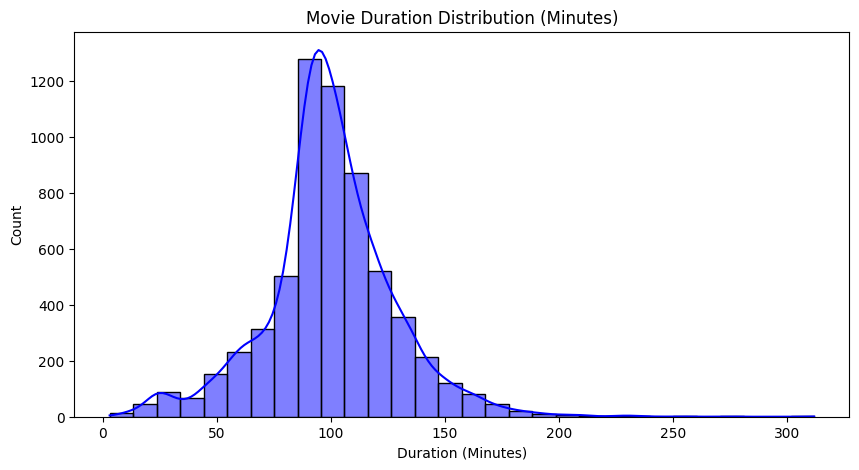

In [ ]:
#how do movie and TV show durations vary 
# Separate movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Movie durations distribution
plt.figure(figsize=(10,5))
sns.histplot(movies['duration_minutes'], bins=30, kde=True, color='blue')
plt.title("Movie Duration Distribution (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\1331679452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\1331679452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seasons', data=tv_shows, palette='cubehelix')


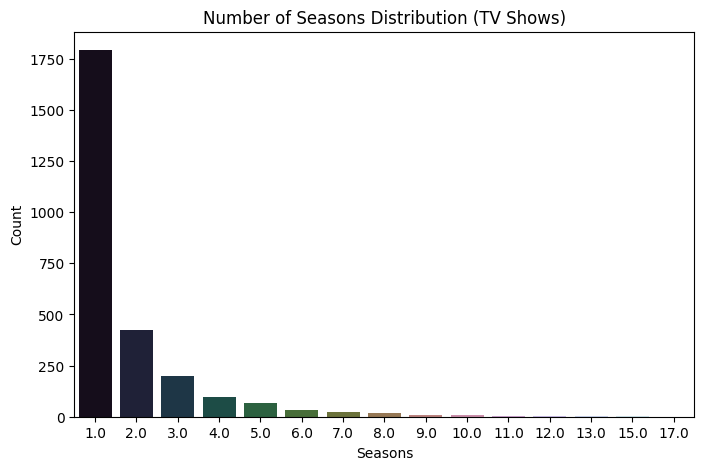

In [67]:
# TV Shows: Count number of seasons
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(8,5))
sns.countplot(x='seasons', data=tv_shows, palette='cubehelix')
plt.title("Number of Seasons Distribution (TV Shows)")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\3959723682.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drama_counts.index, y=drama_counts.values, palette='coolwarm')


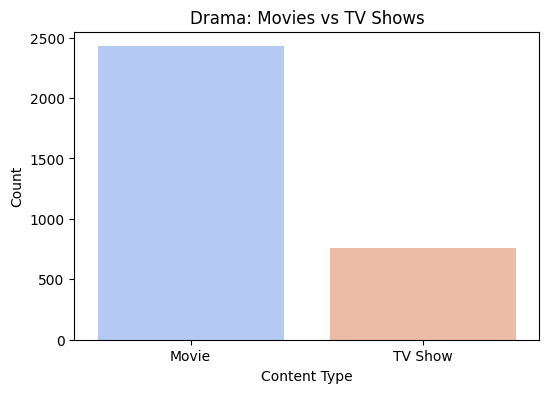

In [70]:
#What kind of content dominates specific genres?
# Example: Drama content
df['is_drama'] = df['listed_in'].str.contains('Drama', case=False, na=False)

drama_counts = df[df['is_drama']]['type'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=drama_counts.index, y=drama_counts.values, palette='coolwarm')
plt.title("Drama: Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


**Section 3 : People and Creators**
- Who are the top 10 most featured directors?

- Which actors appear most frequently in Netflix content?

- Are there directors known only for TV Shows or only for Movies?

In [74]:
df.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
duration_minutes    0
year                0
year_added          0
month_added         0
is_drama            0
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\254092522.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Director', data=director_df, palette='crest')


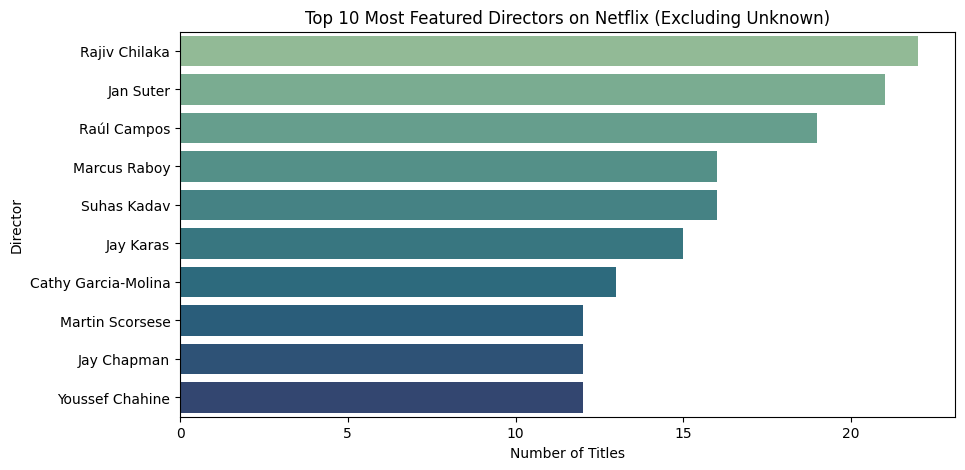

In [76]:
from collections import Counter

# Replace NaN with 'Unknown' temporarily for handling
df['director'] = df['director'].fillna('Unknown')

# Count frequency, skipping 'Unknown'
director_counts = Counter()

for d in df['director']:
    for name in str(d).split(', '):
        if name.strip().lower() != 'unknown':
            director_counts[name] += 1

# Create DataFrame and take top 10
director_df = pd.DataFrame(director_counts.items(), columns=['Director', 'Count'])
director_df = director_df.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Director', data=director_df, palette='crest')
plt.title("Top 10 Most Featured Directors on Netflix (Excluding Unknown)")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\1079774947.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Actor', data=actor_df, palette='mako')


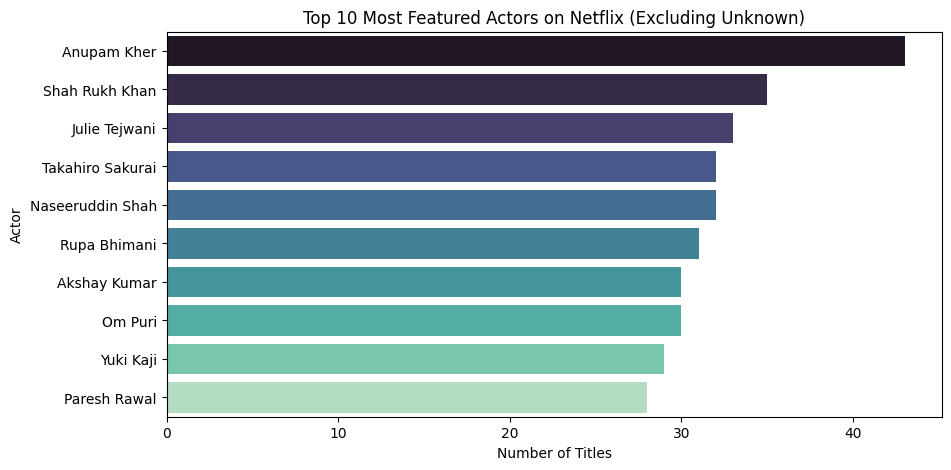

In [83]:
#top 10 actors 
# # Handle missing actors
df['cast'] = df['cast'].fillna('Unknown')

# Count only valid actor names
actor_counts = Counter()
for c in df['cast']:
    for actor in str(c).split(', '):
        if actor.strip().lower() != 'unknown':
            actor_counts[actor] += 1

actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count'])
actor_df = actor_df.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Actor', data=actor_df, palette='mako')
plt.title("Top 10 Most Featured Actors on Netflix (Excluding Unknown)")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\3891580391.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Director', data=director_df, palette='crest', ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\3891580391.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Actor', data=actor_df, palette='mako', ax=axes[1])


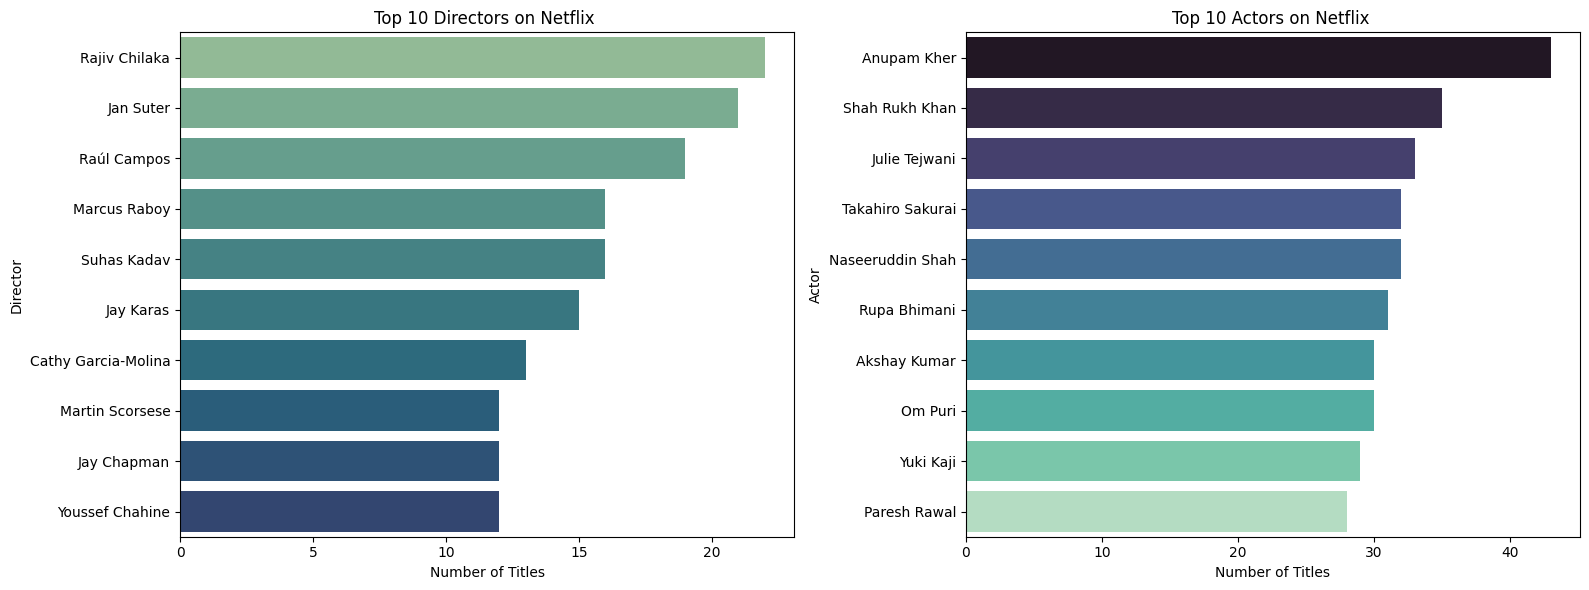

In [86]:
#side by side plot showing top 10 directors and actors
# ===== Directors =====
df['director'] = df['director'].fillna('Unknown')
director_counts = Counter()
for d in df['director']:
    for name in str(d).split(', '):
        if name.strip().lower() != 'unknown':
            director_counts[name] += 1

director_df = pd.DataFrame(director_counts.items(), columns=['Director', 'Count'])
director_df = director_df.sort_values(by='Count', ascending=False).head(10)

# ===== Actors =====
df['cast'] = df['cast'].fillna('Unknown')
actor_counts = Counter()
for c in df['cast']:
    for actor in str(c).split(', '):
        if actor.strip().lower() != 'unknown':
            actor_counts[actor] += 1
            
actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count'])
actor_df = actor_df.sort_values(by='Count', ascending=False).head(10)

#combined plotting 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='Count', y='Director', data=director_df, palette='crest', ax=axes[0])
axes[0].set_title("Top 10 Directors on Netflix ")
axes[0].set_xlabel("Number of Titles")
axes[0].set_ylabel("Director")

# Actors
sns.barplot(x='Count', y='Actor', data=actor_df, palette='mako', ax=axes[1])
axes[1].set_title("Top 10 Actors on Netflix ")
axes[1].set_xlabel("Number of Titles")
axes[1].set_ylabel("Actor")

plt.tight_layout()
plt.show()

In [89]:
#directors known only for tv shows or for movies 
# Get unique directors for each type
movie_directors = set(df[df['type'] == 'Movie']['director'].dropna())
tvshow_directors = set(df[df['type'] == 'TV Show']['director'].dropna())

# Directors only in movies
only_movie_directors = movie_directors - tvshow_directors

# Directors only in TV shows
only_tvshow_directors = tvshow_directors - movie_directors

print("🎬 Directors only known for Movies:")
print(list(only_movie_directors))  

print("\n📺 Directors only known for TV Shows:")
print(list(only_tvshow_directors)) 


🎬 Directors only known for Movies:
['Taika Waititi', 'Paul Haggis', 'Banjong Pisanthanakun, Paween Purikitpanya, Songyos Sugmakanan, Parkpoom Wongpoom, Visute Poolvoralaks', 'Luis Lopez', 'Kireet Khurana, Padmakumar Narasimhamurthy', 'Chayanop Boonprakob', 'Daniel J. Clark', 'Moses Inwang', 'Raúl Campos, Jan Suter', 'Anurin Nwunembom', 'Bert Marcus, Cyrus Saidi', 'Hassan AbdulSalam', 'Saurav Palodhi', 'Mohamed Diab', 'Simon Stone', 'Tate Taylor', 'Agustí Villaronga', 'Ron Davis', 'Rajiv Chilaka, Owll Mina', 'Pa. Ranjith', 'Imtiaz Ali', 'Young Jun Lee', 'Sadeq Behbehani', 'Damon Cardasis', 'John Edginton', 'Balu Mahendra', 'Anjali Nayar', 'Kiki Goshay, Jacqueline Monetta', 'Nikhil Nagesh Bhat', 'Frank Coraci', 'Antonio Chavarrías', 'Dean Craig', 'Sean Foley', 'Priyadarshan', 'Remi Weekes', 'Michael Anderson', 'Vikramaditya Motwane', 'Ivan Ayr', 'Ajithkumar', 'Joshua Marston', 'Alex Coletti', 'Timothy Reckart', 'Chris Moukarbel', 'John Scheinfeld', 'Juan Antonio de la Riva', 'Jang Jae-hy

**Section 4 : Temporal Patterns**
- On which date did Netflix add the most shows or movies?

- Is there any trend in content addition by day/month?

- Does Netflix add more content in certain seasons (e.g. holidays)?

📅 Date(s) with the most additions:
     date_added  Count
1147 2020-01-01    120


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\254774389.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date_added', y='Count', data=top_dates_plot, palette='viridis')


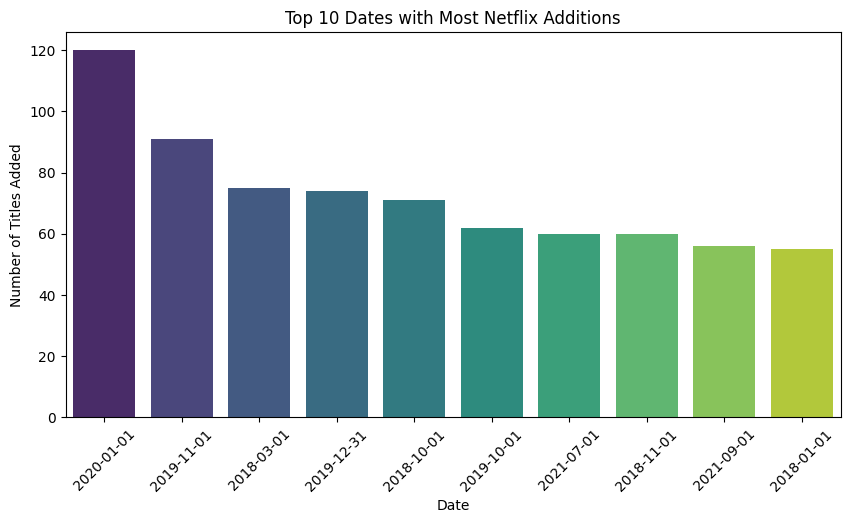

In [90]:
#date with most content addition
# Group by date and count titles
date_counts = df.groupby('date_added').size().reset_index(name='Count')

# Find date(s) with max additions
max_count = date_counts['Count'].max()
top_dates = date_counts[date_counts['Count'] == max_count]

print("📅 Date(s) with the most additions:")
print(top_dates)

# Plot top 10 dates
top_dates_plot = date_counts.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='date_added', y='Count', data=top_dates_plot, palette='viridis')
plt.title("Top 10 Dates with Most Netflix Additions")
plt.xlabel("Date")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\2670324231.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')


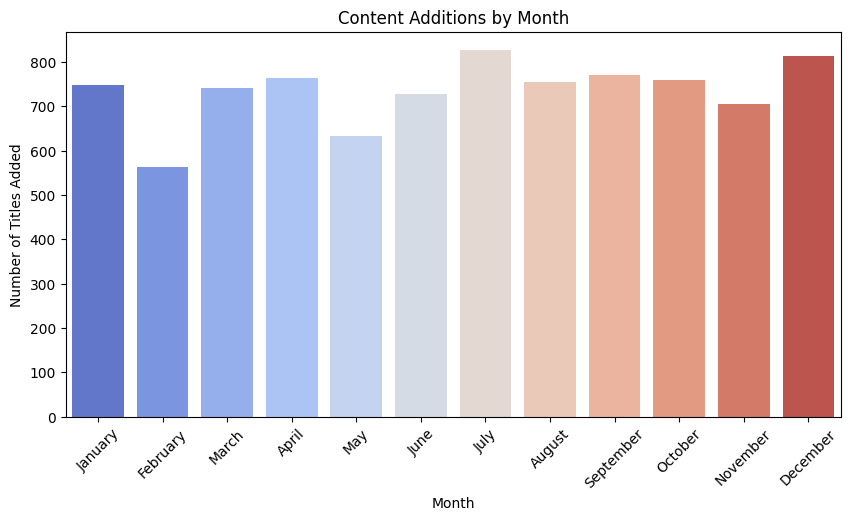

In [91]:
#trend in content addition by date/month
# Extract month name and order it
df['month_added'] = df['date_added'].dt.month_name()
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

month_counts = df['month_added'].value_counts().reindex(month_order)

plt.figure(figsize=(10,5))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')
plt.title("Content Additions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\2370090831.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='pastel')


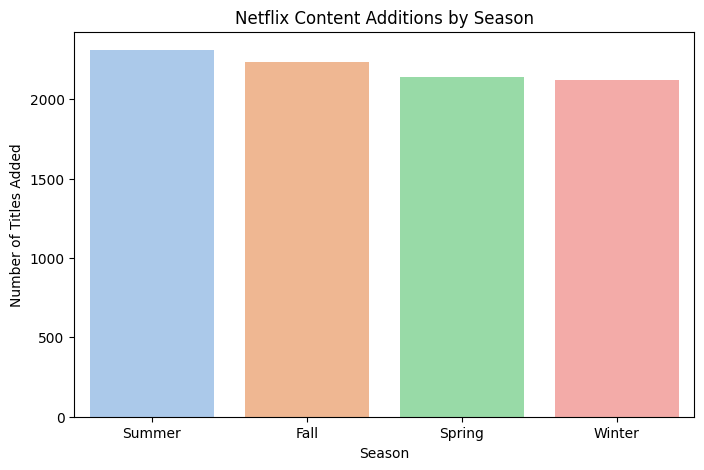

In [93]:
#does netflix add more content in certain seasons
# Define seasons mapping
season_map = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall'
}

df['season'] = df['month_added'].map(season_map)

season_counts = df['season'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='pastel')
plt.title("Netflix Content Additions by Season")
plt.xlabel("Season")
plt.ylabel("Number of Titles Added")
plt.show()


**Section 5 : Correlation and insightful views**
- Correlation between content type and content duration

- Which genres have longer average durations?

- Are there differences in genre popularity between countries?

- Do certain ratings correlate with longer durations or specific genres?

🎬 Avg Movie Duration: 99.58 mins
📺 Avg TV Show Seasons: 1.76 seasons


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\2772952113.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='duration_minutes', palette='Set2')


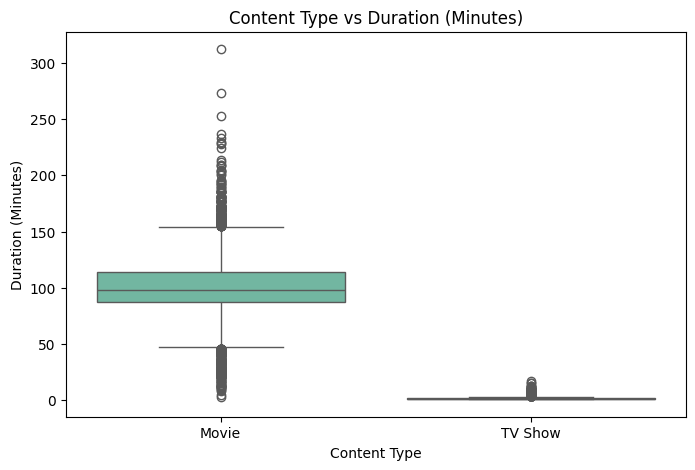

In [94]:
#correlation between content type and content duration

# Prepare seasons for TV shows
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

# Movies
movies = df[df['type'] == 'Movie']

# Average durations
avg_movie_duration = movies['duration_minutes'].mean()
avg_tv_seasons = tv_shows['seasons'].mean()

print(f"🎬 Avg Movie Duration: {avg_movie_duration:.2f} mins")
print(f"📺 Avg TV Show Seasons: {avg_tv_seasons:.2f} seasons")

# Boxplot to compare
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='type', y='duration_minutes', palette='Set2')
plt.title("Content Type vs Duration (Minutes)")
plt.xlabel("Content Type")
plt.ylabel("Duration (Minutes)")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\3746631579.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_avg_df, x='Avg_Duration', y='Genre', palette='mako')


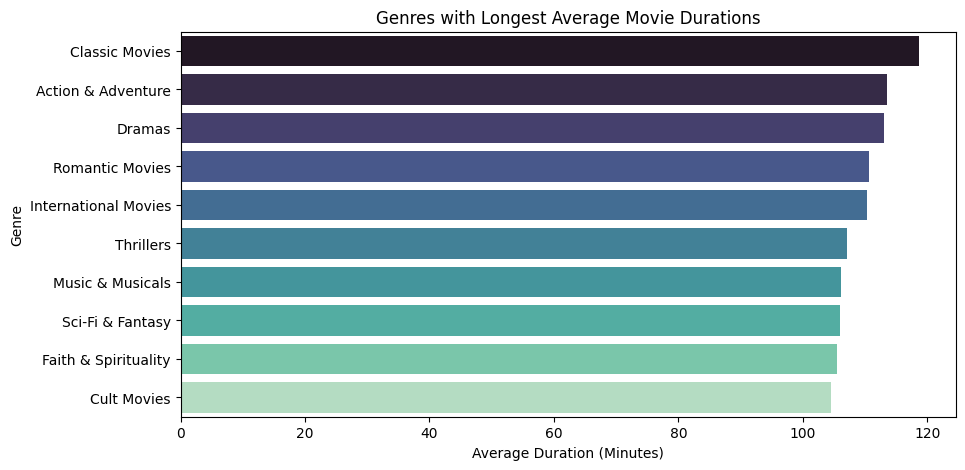

In [95]:
# which genres have longer average
# Expand genres
from collections import defaultdict

genre_durations = defaultdict(list)

for _, row in movies.iterrows():
    for genre in str(row['listed_in']).split(', '):
        if row['duration_minutes'] and not pd.isna(row['duration_minutes']):
            genre_durations[genre].append(row['duration_minutes'])

# Calculate average per genre
genre_avg = {g: sum(v)/len(v) for g,v in genre_durations.items() if len(v) > 5}  # filter rare genres

genre_avg_df = pd.DataFrame(list(genre_avg.items()), columns=['Genre', 'Avg_Duration'])
genre_avg_df = genre_avg_df.sort_values(by='Avg_Duration', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=genre_avg_df, x='Avg_Duration', y='Genre', palette='mako')
plt.title("Genres with Longest Average Movie Durations")
plt.xlabel("Average Duration (Minutes)")
plt.ylabel("Genre")
plt.show()


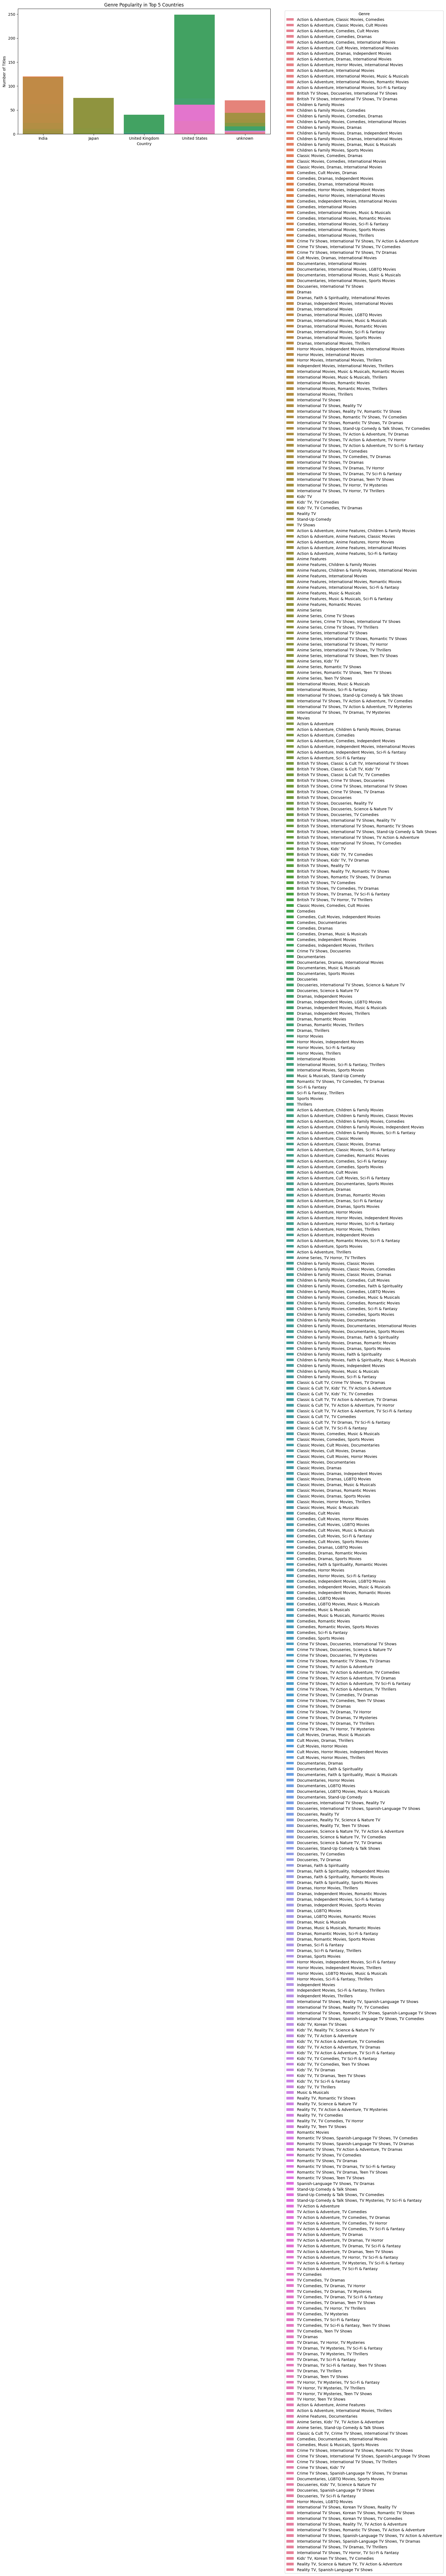

In [96]:
#differene in genre popularity between countries
# Count genres per country
country_genre = df.groupby(['country', 'listed_in']).size().reset_index(name='Count')

# Top countries
top_countries = df['country'].value_counts().head(5).index
country_genre_top = country_genre[country_genre['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.barplot(data=country_genre_top, x='country', y='Count', hue='listed_in', dodge=False)
plt.title("Genre Popularity in Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1))
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9244\4207386480.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_duration, x='duration_minutes', y='rating', palette='coolwarm')


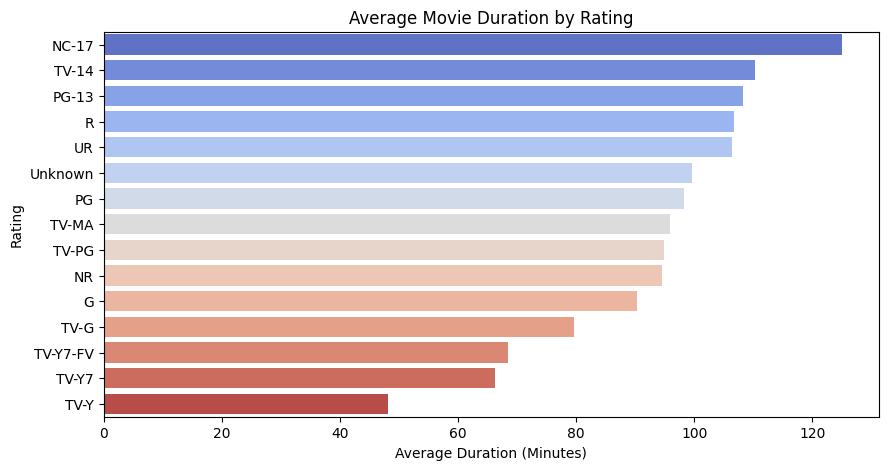

In [97]:
#Rating vs Duration and genre
# Average duration by rating (movies only)
rating_duration = movies.groupby('rating')['duration_minutes'].mean().reset_index()
rating_duration = rating_duration.sort_values(by='duration_minutes', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=rating_duration, x='duration_minutes', y='rating', palette='coolwarm')
plt.title("Average Movie Duration by Rating")
plt.xlabel("Average Duration (Minutes)")
plt.ylabel("Rating")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import pandas as pd
import numpy as np

# =======================
#  Section 1: Content Overview
# =======================
fig1, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Movies vs TV Shows
sns.countplot(data=df, x='type', palette='pastel', ax=axes[0,0])
axes[0,0].set_title("Movies vs TV Shows")
axes[0,0].set_ylabel("Count")

# 2. Content over years
df['year_added'] = df['date_added'].dt.year
yearly_counts = df['year_added'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", color="red", ax=axes[0,1])
axes[0,1].set_title("Content Added Over the Years")

# 3. By month
df['month_added'] = df['date_added'].dt.month_name()
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_counts = df['month_added'].value_counts().reindex(month_order)
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis', ax=axes[1,0])
axes[1,0].set_title("Additions by Month")
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Top countries
country_counts = df['country'].fillna('Unknown').value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm', ax=axes[1,1])
axes[1,1].set_title("Top 10 Producing Countries")

plt.tight_layout()
plt.show()

# =======================
#  Section 2: Genre & Rating
# =======================
fig2, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Top genres
genre_counts = Counter()
for genres in df['listed_in'].fillna(''):
    for genre in genres.split(', '):
        genre_counts[genre] += 1
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)
sns.barplot(x='Count', y='Genre', data=genre_df, palette='mako', ax=axes[0,0])
axes[0,0].set_title("Top Genres")

# 2. Ratings
df['rating'] = df['rating'].apply(lambda x: np.nan if isinstance(x, str) and 'min' in x.lower() else x)
df['rating'] = df['rating'].fillna('Unknown')
rating_counts = df['rating'].value_counts().head(10)
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='cubehelix', ax=axes[0,1])
axes[0,1].set_title("Top Ratings")

# 3. Movie durations
movies = df[df['type'] == 'Movie']
sns.histplot(movies['duration_minutes'], bins=30, kde=True, color='blue', ax=axes[1,0])
axes[1,0].set_title("Movie Duration Distribution")

# 4. TV Show seasons
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)
sns.countplot(x='seasons', data=tv_shows, palette='Set2', ax=axes[1,1])
axes[1,1].set_title("TV Show Seasons Distribution")

plt.tight_layout()
plt.show()

# =======================
#  Section 3: People & Creators
# =======================
fig3, axes = plt.subplots(1, 2, figsize=(16, 6))

# Directors
director_counts = Counter()
for d in df['director'].fillna('Unknown'):
    for name in str(d).split(', '):
        if name.strip().lower() != 'unknown':
            director_counts[name] += 1
director_df = pd.DataFrame(director_counts.items(), columns=['Director', 'Count']).sort_values(by='Count', ascending=False).head(10)
sns.barplot(x='Count', y='Director', data=director_df, palette='crest', ax=axes[0])
axes[0].set_title("Top 10 Directors")

# Actors
actor_counts = Counter()
for c in df['cast'].fillna('Unknown'):
    for actor in str(c).split(', '):
        if actor.strip().lower() != 'unknown':
            actor_counts[actor] += 1
actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False).head(10)
sns.barplot(x='Count', y='Actor', data=actor_df, palette='mako', ax=axes[1])
axes[1].set_title("Top 10 Actors")

plt.tight_layout()
plt.show()

# =======================
#  Section 4: Temporal Patterns
# =======================
fig4, axes = plt.subplots(1, 3, figsize=(18, 5))

# Top date
date_counts = df.groupby('date_added').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(5)
sns.barplot(x='date_added', y='Count', data=date_counts, palette='viridis', ax=axes[0])
axes[0].set_title("Top Dates for Additions")
axes[0].tick_params(axis='x', rotation=45)

# Month pattern
sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm', ax=axes[1])
axes[1].set_title("Additions by Month")
axes[1].tick_params(axis='x', rotation=45)

# Seasons
season_map = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall'
}
df['season'] = df['month_added'].map(season_map)
season_counts = df['season'].value_counts()
sns.barplot(x=season_counts.index, y=season_counts.values, palette='pastel', ax=axes[2])
axes[2].set_title("Additions by Season")

plt.tight_layout()
plt.show()

# =======================
#  Section 5: Correlation & Insights
# =======================
fig5, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Type vs Duration
sns.boxplot(data=movies, x='type', y='duration_minutes', palette='Set2', ax=axes[0,0])
axes[0,0].set_title("Type vs Duration (Movies)")

# 2. Genre avg duration
genre_durations = defaultdict(list)
for _, row in movies.iterrows():
    for genre in str(row['listed_in']).split(', '):
        if not pd.isna(row['duration_minutes']):
            genre_durations[genre].append(row['duration_minutes'])
genre_avg = {g: sum(v)/len(v) for g,v in genre_durations.items() if len(v) > 5}
genre_avg_df = pd.DataFrame(list(genre_avg.items()), columns=['Genre', 'Avg_Duration']).sort_values(by='Avg_Duration', ascending=False).head(10)
sns.barplot(data=genre_avg_df, x='Avg_Duration', y='Genre', palette='mako', ax=axes[0,1])
axes[0,1].set_title("Genres with Longest Avg Durations")

# 3. Rating vs Duration
rating_duration = movies.groupby('rating')['duration_minutes'].mean().reset_index().sort_values(by='duration_minutes', ascending=False)
sns.barplot(data=rating_duration, x='duration_minutes', y='rating', palette='coolwarm', ax=axes[1,0])
axes[1,0].set_title("Avg Movie Duration by Rating")

# 4. Genre popularity by country (Top 3 countries)
top_countries = df['country'].value_counts().head(3).index
country_genre = df[df['country'].isin(top_countries)].groupby(['country', 'listed_in']).size().reset_index(name='Count')
sns.barplot(data=country_genre, x='country', y='Count', hue='listed_in', dodge=False, ax=axes[1,1])
axes[1,1].set_title("Genre Popularity in Top 3 Countries")
axes[1,1].legend([],[], frameon=False)  # hide legend for clarity

plt.tight_layout()
plt.show()
